# Preparation

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/*'.format(shared_drive_foldername)
  print('Running Code in Colab')
except:
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import pandas as pd
import numpy as np
from datetime import datetime
from glob import glob
import sys
sys.path.append(root + '1. Acquisition/notebooks')

from nutrecon import *

subject_nr = 3

_v_ = Vars()

experiment_code = _v_.experiment_code
dataPath = _v_.dataPath
sequences_dataPath = _v_.sequences_dataPath
responses_dataPath = _v_.responses_dataPath

subject_code = '{}{:03d}'.format(experiment_code, subject_nr)

flavorCodes = _v_.flavorCodes

imageCodes = _v_.imageCodes

imageDecoder = _v_.imageDecoder

pres_order_fileID = _v_.pres_order_fileID
pres_order_colName = _v_.pres_order_colName
flavorName_colName = _v_.flavorName_colName
flavorID_colName = _v_.flavorID_colName

pres_order_d2_fileID = _v_.pres_order_d2_fileID
pres_order_d3_fileID = _v_.pres_order_d3_fileID

flav_ratings_fileID = _v_.flav_ratings_fileID

intensity_colName = _v_.intensity_colName
novelty_colName = _v_.novelty_colName
pleasanteness_colName = _v_.pleasanteness_colName

learn_order_fileID = _v_.learn_order_fileID
learningOrder_colName = _v_.learningOrder_colName
imageName_colName = _v_.imageName_colName
imageID_colName = _v_.imageID_colName

assocTestOrder1_colName = _v_.assocTestOrder1_colName
assoc1_order_fileID = _v_.assoc1_order_fileID

assocTestOrder2_colName = _v_.assocTestOrder2_colName
assoc2_order_fileID = _v_.assoc2_order_fileID

assocTestOrder3_colName = _v_.assocTestOrder3_colName
assoc3_order_fileID = _v_.assoc3_order_fileID

neuroEconOrder1_fileID = _v_.neuroEconOrder1_fileID
neuroEconOrder2_fileID = _v_.neuroEconOrder2_fileID

conditioning_order_fileID = _v_.conditioning_order_fileID
conditioning_order_colName = _v_.conditioning_order_colName

ratings_id = _v_.ratings_id
orders_id = _v_.orders_id


learning_path = glob('{}{}*{}*'.format(sequences_dataPath, subject_code, learn_order_fileID))[0]

learnig_df = pd.read_json(learning_path).T
learnig_df[flavorName_colName].tolist()

neuroEcon_id = _v_.neuroEcon_id

neuroEcon_df = pd.read_json(glob('{}{}*{}*'.format(responses_dataPath, subject_code, neuroEcon_id))[0])
flavor_Cplus = neuroEcon_df[neuroEcon_df['Trial Type'] == 'mixed_yogurt'].iloc[0]['reference flavor']
flavor_Cminus = neuroEcon_df[neuroEcon_df['Trial Type'] == 'mixed_yogurt'].iloc[0]['lottery flavor']

marker_order = ['^' if flavor == flavor_Cplus else 'v' if flavor == flavor_Cminus else 'o' if flavor in learnig_df[flavorName_colName].tolist() else 'x' for flavor in list(flavorCodes.keys())]

Running Code locally
Running Code locally


In [2]:
responses_dataPath

'D:/FV/Projects/NUTRECON/Data/nutrecon/responses/'

# Ratings

c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.3333333333333333, 0.6588235294117647, 0.40784313725490196)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5058823529411764, 0.4470588235294118, 0.7019607843137254)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5764705882352941, 0.47058823529411764, 0.3764705882352941)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolo

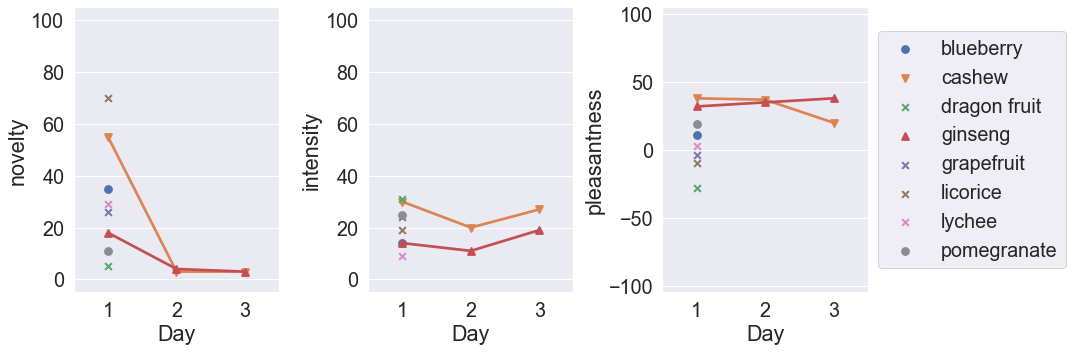

In [2]:


ratings_paths = glob('{}{}*{}*'.format(responses_dataPath, subject_code, ratings_id))


marker_scale = 1
for ratings_path in ratings_paths:
  dayRating_df = pd.read_json(ratings_path)
  fpath, day, preOrder, timestamp =  ratings_path.split('_')
  order_path = glob('{}_{}{}*'.format(fpath.replace('responses', 'sequences'), day, orders_id))[0]
  dayOrder_df = pd.read_json(order_path).T
  dayOrder_df['Trial'] = np.arange(len(dayOrder_df)) + 1
  dayRating_df = dayRating_df.merge(dayOrder_df[[flavorName_colName, flavorID_colName, 'Trial']], left_on = 'Trial', right_on = 'Trial')
  if ratings_path == ratings_paths[0]:
    ratings_df = dayRating_df
  else:
    ratings_df = pd.concat([ratings_df, dayRating_df])

sns.set_theme(font_scale = 1.8)
fig, ax = plt.subplots(ncols = 3, figsize = [15,5])

sns.pointplot(data = ratings_df, x = 'Day', y = novelty_colName, hue = flavorName_colName, hue_order = list(flavorCodes.keys()),
              markers = marker_order, scale=marker_scale, order = [1,2,3], ax = ax[0], legend = False)
ax[0].set_ylim([-5,105]);
ax[0].get_legend().remove();

sns.pointplot(data = ratings_df, x = 'Day', y = intensity_colName, hue = flavorName_colName, hue_order = list(flavorCodes.keys()),
              markers = marker_order, scale=marker_scale, order = [1,2,3], ax = ax[1])
ax[1].set_ylim([-5,105]);
ax[1].get_legend().remove();

sns.pointplot(data = ratings_df, x = 'Day', y = pleasanteness_colName, hue = flavorName_colName, hue_order = list(flavorCodes.keys()),
              markers = marker_order, scale=marker_scale, order = [1,2,3], ax = ax[2])
ax[2].set_ylim([-105,105]);
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

fig.savefig('ratings.png')



# Association Tests

			Accuracy: 1.0


precision  recall  f1-score       Flavor
criteria      image_id flavor_id                                          
in compliance Image I  c                1.0     1.0       1.0       cashew
              Image II e                1.0     1.0       1.0  pomegranate
              Image V  g                1.0     1.0       1.0    blueberry
              Image VI i                1.0     1.0       1.0      ginseng

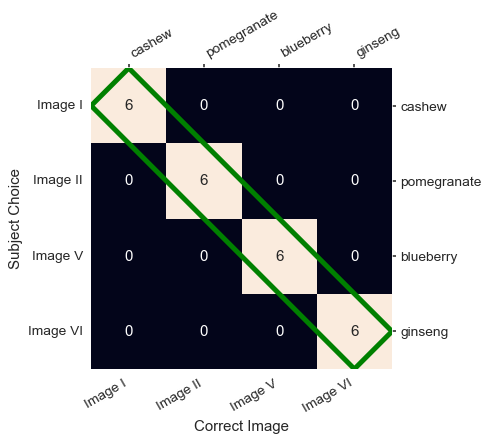

In [3]:
sns.set_theme(font_scale = 1)

min_correctResp = 4
associationTest1_df, _ = loadResponses(sequences_dataPath, assoc1_order_fileID, subject_code)
imageFlavor_df, _ = loadResponses(sequences_dataPath, learn_order_fileID, subject_code)
flavorImage_code = {p[imageID_colName]:p[flavorName_colName] for p in imageFlavor_df.T[[imageID_colName, flavorName_colName]].to_dict('index').values()}
atest_day1_sequence = [get_key(imageDecoder,p) for p in associationTest1_df.T['image_id'].tolist()]
atest_day1_responses, _ = loadResponses(responses_dataPath, 'day1_atest', subject_code)

fig, report = reportAndConfusionMatrix(atest_day1_sequence, atest_day1_responses['image_id'].tolist(), flavorImage_code)
plt.tight_layout()
fig.savefig('atest1.png', transparent=True)
check_atest(report, flavorImage_code, min_correctResp)

			Accuracy: 1.0


precision  recall  f1-score   Flavor
criteria      image_id flavor_id                                      
in compliance Image I  c                1.0     1.0       1.0   cashew
              Image VI i                1.0     1.0       1.0  ginseng

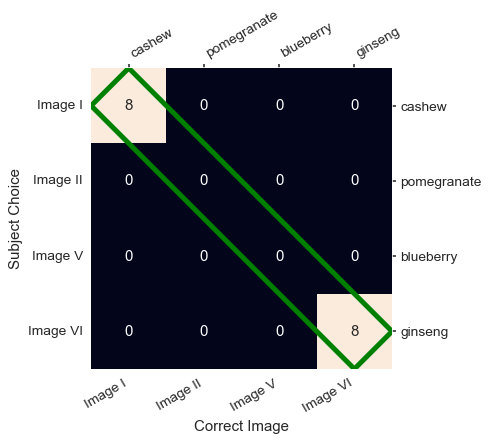

In [4]:
min_correctResp = 7
associationTest2_df, _ = loadResponses(sequences_dataPath, assoc2_order_fileID, subject_code)
imageFlavor_df, _ = loadResponses(sequences_dataPath, learn_order_fileID, subject_code)
flavorImage_code = {p[imageID_colName]:p[flavorName_colName] for p in imageFlavor_df.T[[imageID_colName, flavorName_colName]].to_dict('index').values()}
atest_day2_sequence = [get_key(imageDecoder,p) for p in associationTest2_df.T['image_id'].tolist()]
atest_day2_responses, _ = loadResponses(responses_dataPath, 'day2_atest', subject_code)

fig, report = reportAndConfusionMatrix(atest_day2_sequence, atest_day2_responses['image_id'].tolist(), flavorImage_code)
plt.tight_layout()
fig.savefig('atest2.png', transparent=True)
check_atest(report, flavorImage_code, min_correctResp)

			Accuracy: 1.0


precision  recall  f1-score   Flavor
criteria      image_id flavor_id                                      
in compliance Image I  c                1.0     1.0       1.0   cashew
              Image VI i                1.0     1.0       1.0  ginseng

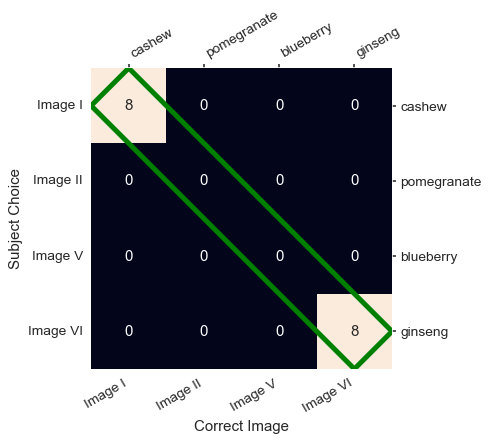

In [5]:
min_correctResp = 7

associationTest3_df, _ = loadResponses(sequences_dataPath, assoc3_order_fileID, subject_code)
imageFlavor_df, _ = loadResponses(sequences_dataPath, learn_order_fileID, subject_code)
flavorImage_code = {p[imageID_colName]:p[flavorName_colName] for p in imageFlavor_df.T[[imageID_colName, flavorName_colName]].to_dict('index').values()}
atest_day3_sequence = [get_key(imageDecoder,p) for p in associationTest3_df.T['image_id'].tolist()]
atest_day3_responses, _ = loadResponses(responses_dataPath, 'day3_atest', subject_code)

fig, report = reportAndConfusionMatrix(atest_day3_sequence, atest_day3_responses['image_id'].tolist(), flavorImage_code)
plt.tight_layout()
fig.savefig('atest3.png', transparent=True)
check_atest(report, flavorImage_code, min_correctResp)

# Reaction times

In [6]:



neuroEcon_paths = glob('{}{}*{}*'.format(responses_dataPath, subject_code, neuroEcon_id))
neuroEcon_path = neuroEcon_paths[0]

for neuroEcon_path in neuroEcon_paths:
  dayNeuroEcon_df = pd.read_json(neuroEcon_path)
  if neuroEcon_path == neuroEcon_paths[0]:
    neuroEcon_df = dayNeuroEcon_df
  else:
    neuroEcon_df = pd.concat([neuroEcon_df, dayNeuroEcon_df])
neuroEcon_df['reaction_time'] = neuroEcon_df['choiceTime_ms'] - neuroEcon_df['choiceStart_ms']
neuroEcon_df['Day'] = neuroEcon_df['Day'].apply(lambda day: int(day[-1]))

neuroEcon_df.columns



Index(['Day', 'Trial', 'Trial ID', 'Trial Type', 'User', 'block', 'choice',
       'choiceStart_ms', 'choiceTime', 'choiceTime_ms', 'feedbackTime',
       'lottery flavor', 'lottery p', 'lottery qt', 'lottery shape',
       'lottery type', 'optionTime', 'reference flavor', 'reference p',
       'reference qt', 'reference shape', 'reference type',
       'trialStartTimestamp', 'trialStart_ms', 'reaction_time'],
      dtype='object')

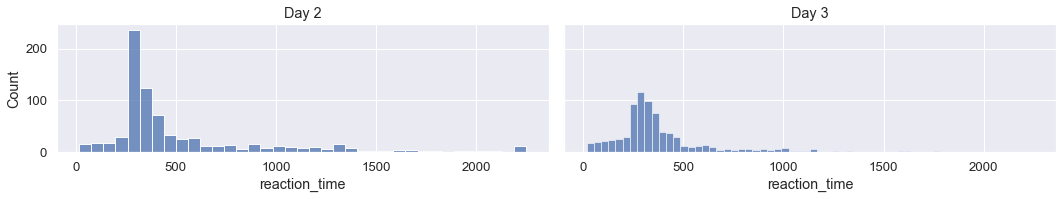

In [7]:
sns.set_theme(font_scale = 1.2)
fig, ax = plt.subplots(ncols = 2, figsize = [15,3], sharey = True, sharex = True)
c = 0
for day in neuroEcon_df['Day'].unique():
  sns.histplot(data = neuroEcon_df[neuroEcon_df['Day'] == day], x = 'reaction_time', ax = ax[c])
  ax[c].set_title('Day {}'.format(day))
  c+=1
plt.tight_layout()
fig.savefig('reaction_time.png')

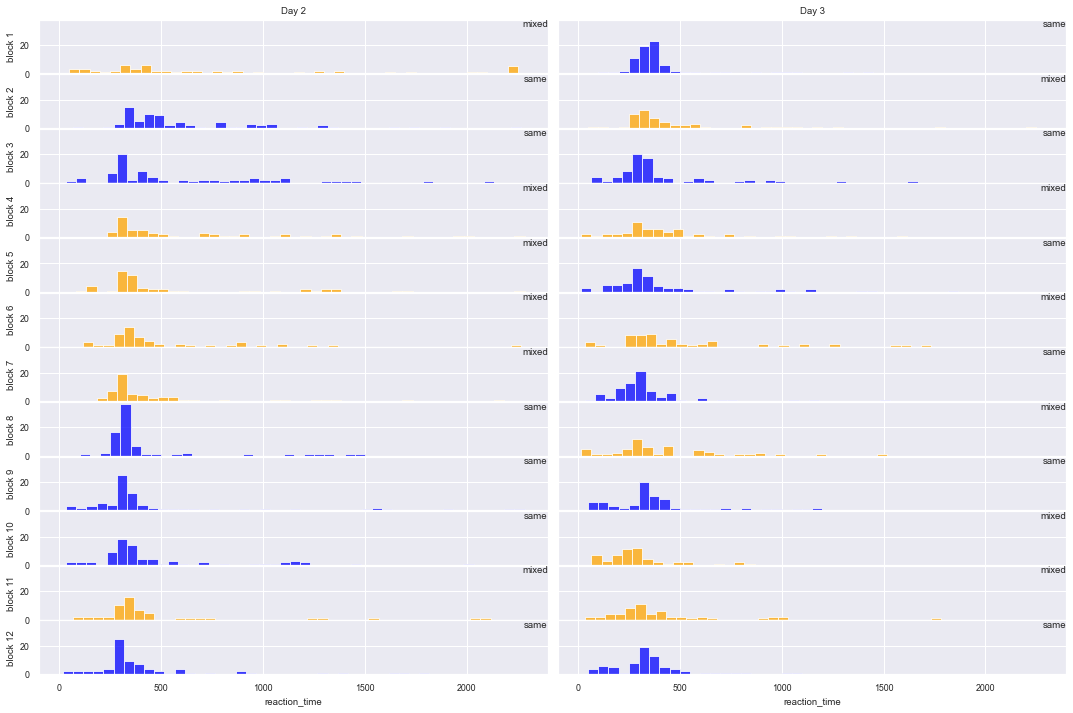

In [8]:
sns.set_theme(font_scale = .8)
fig, ax = plt.subplots(ncols = 2, nrows = len(neuroEcon_df['block'].unique()), figsize = [15,10], sharex = True, sharey = True)

row = 0

for block in neuroEcon_df['block'].unique():
  df_ = neuroEcon_df[neuroEcon_df['block'] == block]  
  col = 0
  for day in df_['Day'].unique():
    block_type = df_[df_['Day'] == day]['Trial Type'].tolist()[0]
    if block_type == 'same':
      color = 'blue'
    else:
      block_type = 'mixed'
      color = 'orange'
    sns.histplot(data = df_[df_['Day'] == day], x = 'reaction_time', ax = ax[row, col],  binwidth=50, color = color)
    ax[row,col].set_ylabel('')
    ax[row,col].text(1,1,block_type, ha='right', va = 'top', transform = ax[row,col].transAxes)
    col+=1
  ax[row,0].set_ylabel('block {}'.format(block + 1))
    
  row += 1

ax[0,0].set_title('Day 2')
ax[0,1].set_title('Day 3')
plt.tight_layout(h_pad = -.5)
fig.savefig('block_reactionTime.png')

# Mixed iogurt preference

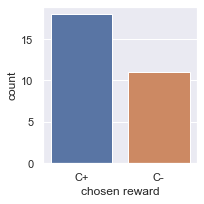

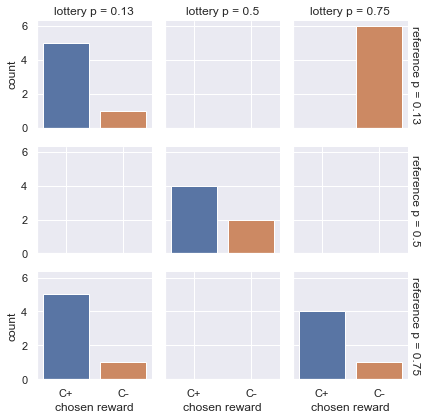

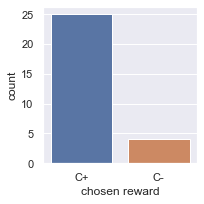

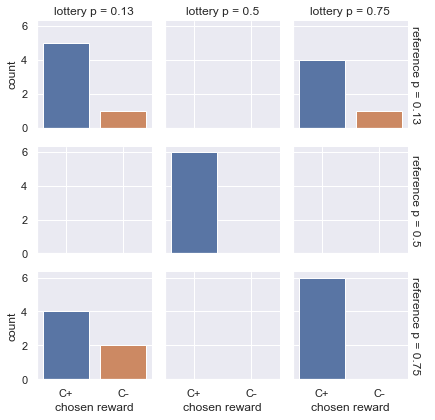

In [9]:
c_palette = sns.color_palette()

sns.set_theme(font_scale = 1)
def get_reward_choice(row):
  if row['choice'] == 1:
    reward = row['reference type']
  elif row['choice'] == 2:
    reward = row['lottery type']
  else:
    reward = ''

  return reward

neuroEcon_df['chosen reward'] = neuroEcon_df.apply(lambda row: get_reward_choice(row), axis = 1)
df = neuroEcon_df[neuroEcon_df['Trial Type'] == 'mixed_yogurt']
fig, ax = plt.subplots(figsize = [3,3])
sns.countplot(data=df[df['Day'] == 2 ], x='chosen reward', order = ['C+', 'C-']);
plt.tight_layout()
fig.savefig('mixedYogurt_choicesD2.png')

grid = sns.FacetGrid(data=df[df['Day'] == 2 ], row = 'reference p', col = 'lottery p',height=2,aspect=1, margin_titles = True, sharey = True)
fig = grid.map_dataframe(sns.countplot, x='chosen reward', order = ['C+', 'C-'], palette = c_palette[:2])
fig.add_legend()

fig, ax = plt.subplots(figsize = [3,3])
sns.countplot(data=df[df['Day'] == 3 ], x='chosen reward', order = ['C+', 'C-']);
plt.tight_layout()
fig.savefig('mixedYogurt_choicesD3.png')

grid = sns.FacetGrid(data=df[df['Day'] == 3 ], row = 'reference p', col = 'lottery p',height=2,aspect=1, margin_titles = True, sharey = True)
fig = grid.map_dataframe(sns.countplot, x='chosen reward', order = ['C+', 'C-'], palette = c_palette[:2])
fig.add_legend()


# Parameter estimation

In [10]:
column_names = ['reference type', 'reference qt', 'reference p',
                'lottery type', 'lottery qt', 'lottery p',
                'ref_alpha', 'lott_alpha', 'beta',
                'ref_EU', 'lott_EU', 'pL', 'choice',
                'ref_alphaEstimates', 'lott_alphaEstimates', 'betaEstimates',
                'ref_alphaEstimStdErr', 'lott_alphaEstimStdErr', 'betaEstimStdErr']

optimize_cols = column_names[:6]  + [column_names[12]]
optimize_cols

['reference type',
 'reference qt',
 'reference p',
 'lottery type',
 'lottery qt',
 'lottery p',
 'choice']

In [11]:
def get_EU_(p,X, alpha):
  return p * X**alpha

def get_pL_(euL, euR, beta):
  return 1 - 1/(1 + np.exp(beta * (euL - euR)))


def get_likelihood(row, params, cols = optimize_cols):
  ref_type = row[cols[0]]
  lott_type = row[cols[3]]
  if len(params) == 4:
    (alpha_money, alpha_Cplus, alpha_Cminus, beta) = params
    alphas = {'money' : alpha_money,
             'C+' : alpha_Cplus,
             'C-' : alpha_Cminus}
    ref_alpha = alphas[ref_type]
    lott_alpha = alphas[lott_type]
  elif len(params) == 6:
    (alpha_money, alpha_Cplus, alpha_Cminus, beta_money, beta_Cplus, beta_Cminus) = params
    alphas = {'money' : alpha_money,
             'C+' : alpha_Cplus,
             'C-' : alpha_Cminus}
    betas = {'money' : beta_money,
             'C+' : beta_Cplus,
             'C-' : beta_Cminus}
    ref_alpha = alphas[ref_type]
    lott_alpha = alphas[lott_type]
    beta = betas[lott_type]
  
  choice = row[cols[6]]

  ref_X = row[cols[1]]
  ref_p = row[cols[2]]
  ref_EU = get_EU_(ref_p, ref_X, ref_alpha)
  
  lott_X = row[cols[4]]
  lott_p = row[cols[5]]
  lott_EU = get_EU_(lott_p, lott_X, lott_alpha)

  pL = get_pL_(lott_EU, ref_EU, beta)
  if choice == 1:
    likelihood = pL
  else:
    likelihood = 1 - pL
  return likelihood

def get_negLogLikelihood(params, args):

  df = args
  task_cols = optimize_cols
  # compute likelihood of each choice
  likelihood = df.apply(lambda row: get_likelihood(row, params, cols = task_cols), axis=1).values
  # Take negative of logLikelihood for convention
  negloglikelihood = - np.sum(np.log(likelihood))
  return negloglikelihood

In [12]:
from scipy.optimize import minimize
#from sklearn.linear_model import LogisticRegression
from numpy.core.fromnumeric import resize
alphaMoney0 = 0
alphaCplus0 = 0
alphaCminus0 =0
beta0 = 0

df_day2 = neuroEcon_df[neuroEcon_df['Day'] == 2]

df_sameType = df_day2[df_day2['Trial Type'] == 'same']
df_sameType['choice'] = np.where(df_sameType['choice'] == 2, 1, 0)

args = (df_sameType)
x0 = (alphaMoney0, alphaCplus0, alphaCminus0, beta0)
res = minimize(get_negLogLikelihood, x0, args=args )

parsCI = ['{} \xb1 {}'.format(round(res.x[p],3), round(1.96*np.sqrt(np.diag(res.hess_inv))[p],3)) for p in range(len(res.x))]

print('\nConfidene intervals:')
print('  - {}: {}'.format('alpha Money', parsCI[0]))
print('  - {}: {}'.format('alpha C+', parsCI[1]))
print('  - {}: {}'.format('alpha C-', parsCI[2]))
print('  - {}: {}'.format('beta', parsCI[3]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\819981826.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sameType['choice'] = np.where(df_sameType['choice'] == 2, 1, 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:5: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL - euR)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:54: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:5: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL - euR)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:54: RuntimeWarning: divide by zero 


Confidene intervals:
  - alpha Money: 1.297 ± 0.198
  - alpha C+: 0.818 ± 0.086
  - alpha C-: 0.882 ± 0.082
  - beta: 0.286 ± 0.103


In [13]:
from scipy.optimize import minimize
#from sklearn.linear_model import LogisticRegression
from numpy.core.fromnumeric import resize
alphaMoney0 = 0
alphaCplus0 = 0
alphaCminus0 =0
beta0 = 0

df_day3 = neuroEcon_df[neuroEcon_df['Day'] == 3]

df_sameType = df_day3[df_day3['Trial Type'] == 'same']
df_sameType['choice'] = np.where(df_sameType['choice'] == 2, 1, 0)

args = (df_sameType)
x0 = (alphaMoney0, alphaCplus0, alphaCminus0, beta0)
res = minimize(get_negLogLikelihood, x0, args=args )

parsCI = ['{} \xb1 {}'.format(round(res.x[p],3), round(1.96*np.sqrt(np.diag(res.hess_inv))[p],3)) for p in range(len(res.x))]

print('\nConfidene intervals:')
print('  - {}: {}'.format('alpha Money', parsCI[0]))
print('  - {}: {}'.format('alpha C+', parsCI[1]))
print('  - {}: {}'.format('alpha C-', parsCI[2]))
print('  - {}: {}'.format('beta', parsCI[3]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\1096110552.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sameType['choice'] = np.where(df_sameType['choice'] == 2, 1, 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:5: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL - euR)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:54: RuntimeWarning: divide by zero encountered in log
  negloglikelihood = - np.sum(np.log(likelihood))
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:5: RuntimeWarning: overflow encountered in exp
  return 1 - 1/(1 + np.exp(beta * (euL - euR)))
C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\118110776.py:54: RuntimeWarning: divide by zero


Confidene intervals:
  - alpha Money: 1.426 ± 0.226
  - alpha C+: 0.87 ± 0.086
  - alpha C-: 0.894 ± 0.082
  - beta: 0.275 ± 0.099


# Mixed Trials

In [15]:
def get_choice_side(row):
  if row['choice'] == 1:
    reward = 'reference'
  elif row['choice'] == 2:
    reward = 'lottery'
  else:
    reward = ''

  return reward
df_mixedType = df_day2[df_day2['Trial Type'] == 'mixed']
df_mixedType['chosen option'] = df_mixedType.apply(lambda row: get_choice_side(row), axis = 1)
df_mixedType.drop(columns=['Day', 'optionTime', 'choiceTime', 'feedbackTime', 'User', 'Trial ID', 'Trial Type'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2012\1409785992.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mixedType['chosen option'] = df_mixedType.apply(lambda row: get_choice_side(row), axis = 1)


,Trial,block,choice,choiceStart_ms,choiceTime_ms,lottery flavor,lottery p,lottery qt,lottery shape,lottery type,reference flavor,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms,reaction_time,chosen reward,chosen option
0,1,0,0,58660,60910,ginseng,0.75,200,cross,C+,,1.0,0.2,,money,1670580853,56710,2250,,
1,2,0,0,63682,65932,ginseng,0.22,200,cross,C+,,1.0,0.2,,money,1670580858,61768,2250,,
2,3,0,0,68721,70971,cashew,0.75,150,square,C-,,1.0,0.2,,money,1670580863,66801,2250,,
3,4,0,0,73760,76010,cashew,0.38,80,square,C-,,1.0,0.2,,money,1670580868,71815,2250,,
4,5,0,1,78782,78849,cashew,0.22,40,square,C-,,1.0,0.2,,money,1670580873,76853,67,money,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,700,10,2,2628721,2629072,ginseng,0.38,120,cross,C+,,1.0,0.2,,money,1670583423,2626777,351,C+,lottery
700,701,10,2,2631825,2632142,ginseng,0.38,80,cross,C+,,1.0,0.2,,money,1670583426,2629878,317,C+,lottery
701,702,10,2,2634895,2635245,ginseng,0.38,200,cross,C+,,1.0,0.2,,money,1670583429,2632954,350,C+,lottery
702,703,10,2,2637998,2638349,cashew,0.38,120,square,C-,,1.0,0.2,,money,1670583433,2636063,351,C-,lottery


c:\Users\Admin\anaconda3\envs\nutrecon\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


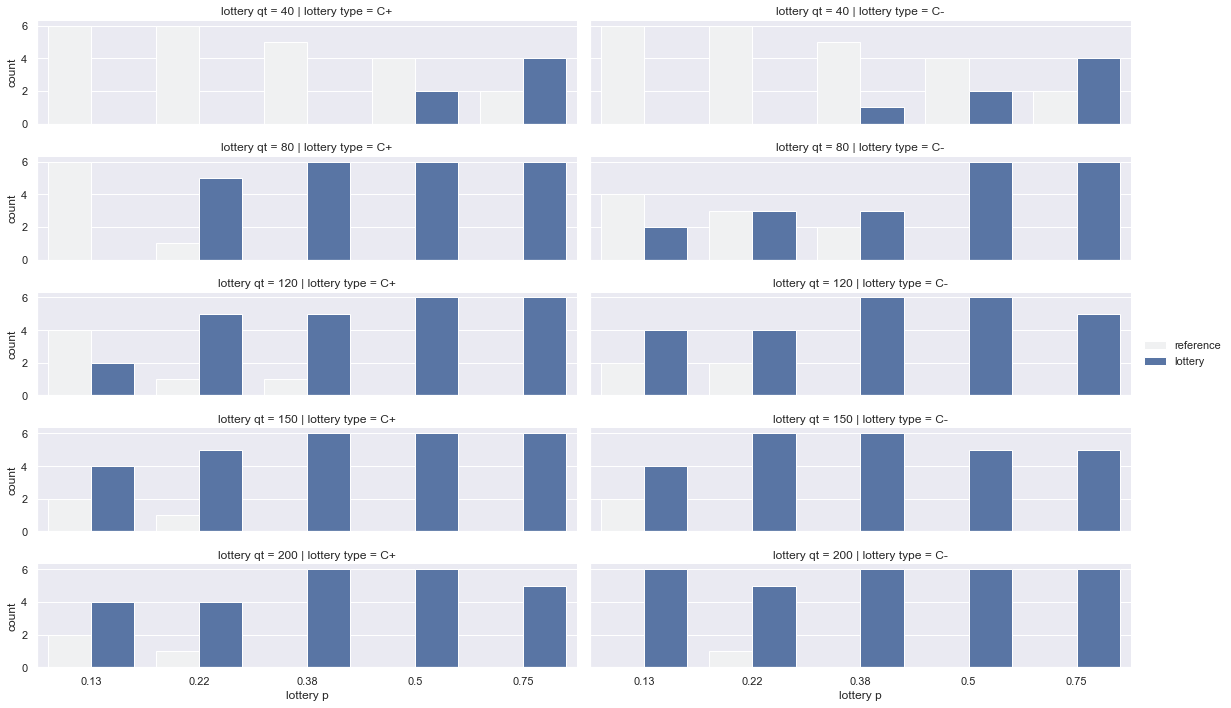

In [16]:
def countplot(x, hue,  **kwargs):
    sns.countplot(x=x, hue = hue, **kwargs)

grid = sns.FacetGrid(data=df_mixedType, row = 'lottery qt', col = 'lottery type',size=2,aspect=4)
fig = grid.map_dataframe(sns.countplot, x='lottery p', hue = 'chosen option', hue_order = ['reference', 'lottery'])
fig.add_legend()

In [18]:
tmp = pd.read_json('D:/FV/Projects/NUTRECON/nutreconDrive/2. demoData/raw/nutrecon/responses/exampleSub001_day3_neuroEcon_1669800213.json')
sns.set_theme(font_scale = 1)


tmp['chosen reward'] = tmp.apply(lambda row: get_choice_side(row), axis = 1)
tmp.drop(columns=['Day', 'optionTime', 'choiceTime', 'feedbackTime', 'User'])

,Trial,Trial ID,Trial Type,block,choice,choiceStart_ms,choiceTime_ms,lottery flavor,lottery p,lottery qt,lottery shape,lottery type,reference flavor,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms,chosen reward
0,1,82,mixed,0,2,914071,915623,pomegranate,0.38,80,square,C+,,1.0,0.2,,money,1669801124,912146,lottery
1,2,103,mixed,0,1,918376,919127,cashew,0.50,40,hexagon,C-,,1.0,0.2,,money,1669801128,916505,reference
2,3,79,mixed,0,2,921880,922247,pomegranate,0.75,40,square,C+,,1.0,0.2,,money,1669801132,919990,lottery
3,4,95,mixed,0,2,925017,926685,pomegranate,0.13,200,square,C+,,1.0,0.2,,money,1669801135,923151,lottery
4,5,107,mixed,0,1,929505,929855,cashew,0.38,80,hexagon,C-,,1.0,0.2,,money,1669801139,927633,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,775,29,same,11,1,4703975,4704459,pomegranate,0.75,20,square,C+,pomegranate,1.0,20.0,square,C+,1669804914,4702120,reference
775,776,13,same,11,2,4708863,4709481,,0.50,5,,money,,1.0,1.0,,money,1669804919,4707009,lottery
776,777,10,same,11,1,4713802,4714119,,0.13,5,,money,,1.0,1.0,,money,1669804924,4711948,reference
777,778,52,same,11,2,4718557,4718708,cashew,0.38,20,hexagon,C-,cashew,1.0,20.0,hexagon,C-,1669804928,4716702,lottery
